In [1]:
# Nico T. Solitana
# De La Salle University Manila

import pandas as pd 
import numpy as np 
from data_cleaner import *
from gensim_vectorizer import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from training_testing import *

In [2]:
# Load Dataset
data = pd.read_csv('Dataset\\water_problem_nlp_en_for_Kaggle_filtered.csv')
data = data.fillna(0)
data.head()

X = data['text'] 
y = data[list(data.columns[1:])].values 
download_necessary_functions()

In [3]:
data_labels = data[["env_problems", "pollution", "treatment", "climate", "biomonitoring"]]
data_labels.head()

,env_problems,pollution,treatment,climate,biomonitoring
0,1,1.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0
3,1,1.0,0.0,0.0,0.0
4,1,1.0,0.0,0.0,0.0


In [4]:
# Converts tokens into vectors
def ConvertToTfIdfVector(df):
    tfidf_vec = TfidfVectorizer(analyzer=clean_text)
    xtfidf_fit = tfidf_vec.fit(df['text'])
    xtfidf = xtfidf_fit.fit_transform(df['text'])
    X = pd.DataFrame(xtfidf.toarray())
    return X

In [5]:
# Vectorizing Text
X = ConvertToTfIdfVector(data)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
# ONE VS REST + LOGISTIC REGRESSION
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: OneVsRestClassifier(LogisticRegression(solver='lbfgs',max_iter=500)))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance_Multilabel()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))

[0.15384615 0.53846154 0.23076923 0.30769231 0.16666667]
Accuracy: 0.625 FScore: 0.857 Precision: 0.857 Recall: 0.857


In [13]:
# ONE VS REST + RANDOM FOREST
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: OneVsRestClassifier(RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1)))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance_Multilabel()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))

[0.30769231 0.23076923 0.38461538 0.23076923 0.41666667]
Accuracy: 0.625 FScore: 0.903 Precision: 1.0 Recall: 0.824


In [20]:
# ONE VS REST + SVM
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: OneVsRestClassifier(LinearSVC(C = 1, random_state=0)))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance_Multilabel()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))

[0.53846154 0.46153846 0.53846154 0.23076923 0.58333333]
Accuracy: 0.75 FScore: 0.909 Precision: 0.938 Recall: 0.882


In [17]:
# ONE VS REST + GRADIENT BOOST
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: OneVsRestClassifier(GradientBoostingClassifier(learning_rate=10, 
                max_depth=2, random_state=0)))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance_Multilabel()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))

[0.   0.   0.   0.   0.25]
Accuracy: 0.0 FScore: 0.387 Precision: 0.429 Recall: 0.353


In [7]:
import seaborn as sns
def PlotCM(cm):
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    categories = ['Male', 'Female']
    sns.heatmap(cm, annot=labels, fmt='')

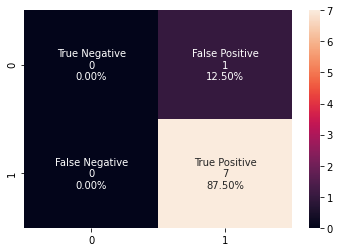

In [8]:
PlotCM(cf_matrix[0])